In [58]:
import re
import pandas as pd

In [51]:
with open('kinet10_opt.inp', 'r') as f1:
    content1 = f1.readlines()

kin10 = {}
for line in content1:
    if '$ double precision, parameter :: p' in line:
        # extract p parameters and values
        pattern = r'p(\d+)\s*=\s*([\d\.\+\-d]+)'
        match = re.search(pattern, line)
        if match:
            param_name = 'p' + match.group(1)
            value = float(match.group(2).replace('d','e'))
            kin10[param_name] = value

In [53]:
with open('kinet12.5_opt.inp', 'r') as f2:
    content2 = f2.readlines()

kin12 = {}
for line in content2:
    if '$ double precision, parameter :: p' in line:
        # extract p parameters and values
        pattern = r'p(\d+)\s*=\s*([\d\.\+\-d]+)'
        match = re.search(pattern, line)
        if match:
            param_name = 'p' + match.group(1)
            value = float(match.group(2).replace('d','e'))
            kin12[param_name] = value

In [55]:
with open('kinet15_opt.inp', 'r') as f3:
    content3 = f3.readlines()

kin15 = {}
for line in content3:
    if '$ double precision, parameter :: p' in line:
        # extract p parameters and values
        pattern = r'p(\d+)\s*=\s*([\d\.\+\-d]+)'
        match = re.search(pattern, line)
        if match:
            param_name = 'p' + match.group(1)
            value = float(match.group(2).replace('d','e'))
            kin15[param_name] = value

In [69]:
df = pd.DataFrame(list(kin10.values()), columns=['10kV'])
df['12.5kV'] = list(kin12.values())
df['15kV'] = list(kin15.values())

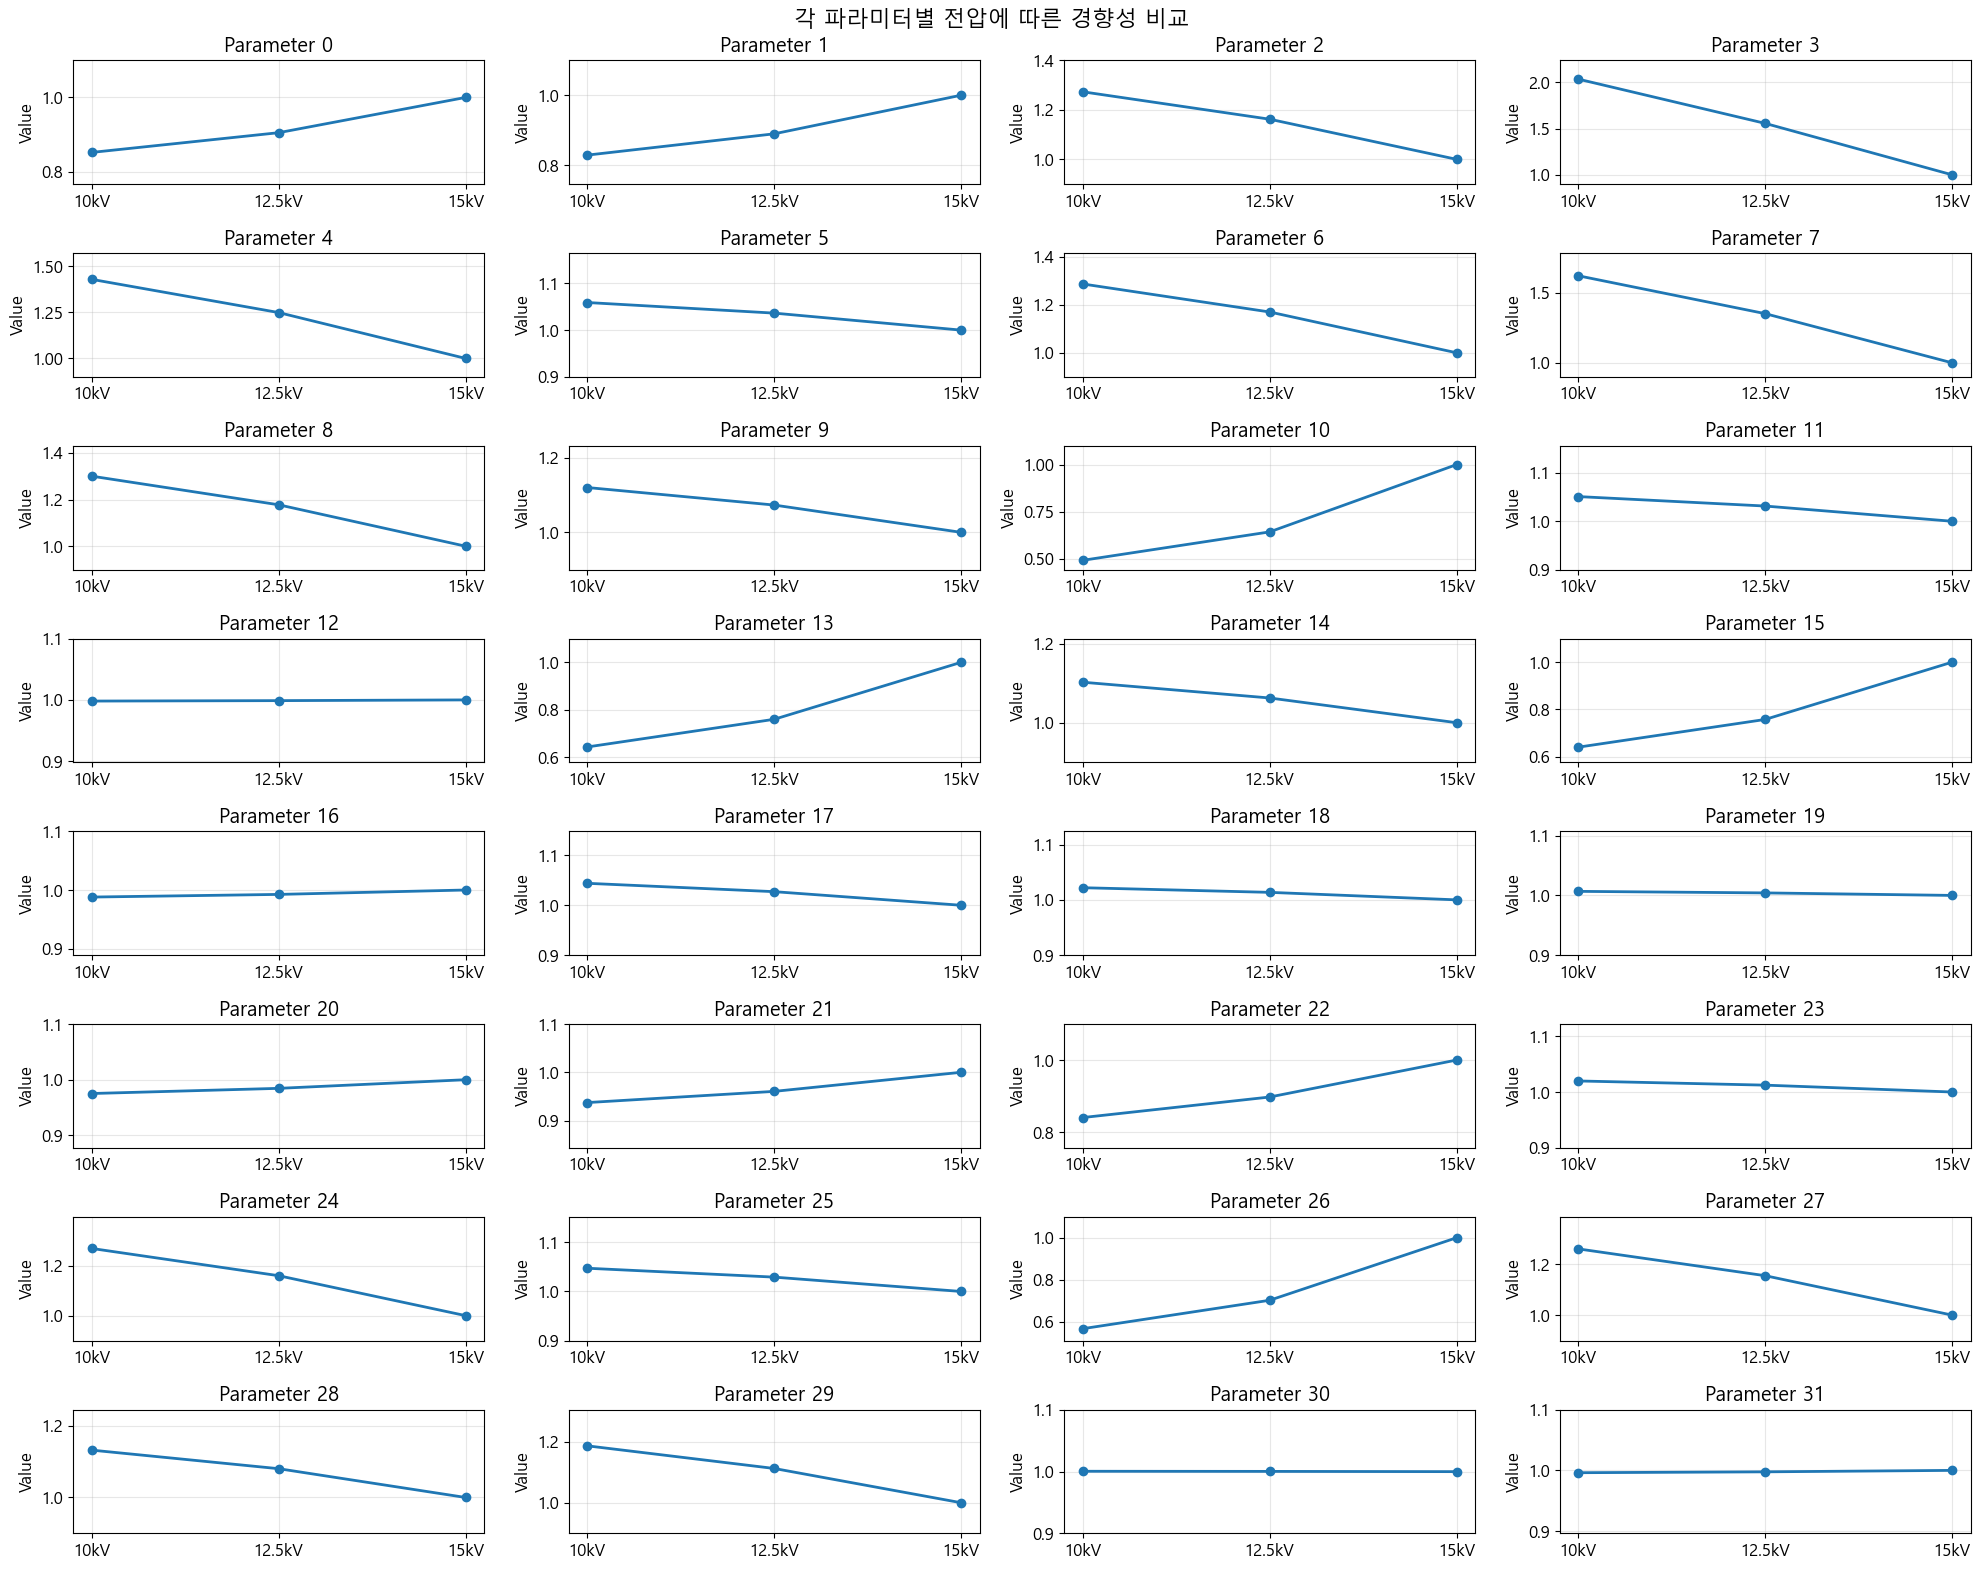

In [74]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(8, 4, figsize=(20, 16))
fig.suptitle('각 파라미터별 전압에 따른 경향성 비교', fontsize=16)

# 각 행(파라미터)별로 서브플롯 생성
for i in range(len(df)):
    row = i // 4  # 행 위치
    col = i % 4   # 열 위치
    
    # 해당 파라미터의 데이터 추출
    param_data = df.iloc[i]
    voltages = ['10kV', '12.5kV', '15kV']
    values = param_data.values
    
    # 서브플롯에 선 그래프 그리기
    axes[row, col].plot(voltages, values, 'o-', linewidth=2, markersize=6)
    axes[row, col].set_title(f'Parameter {i}')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)
    
    # y축 범위 설정 (데이터에 따라 자동 조정)
    axes[row, col].set_ylim(min(values) * 0.9, max(values) * 1.1)

plt.tight_layout()
plt.show()

In [63]:
df

,10kV
0,0.85195
1,0.82856
2,1.27320
3,2.03500
4,1.42970
5,1.05910
6,1.28650
7,1.62210
8,1.30000
9,1.12040
